In [1]:
%matplotlib widget

In [2]:
isdark = True

In [3]:
# initialization

from rayoptics.environment import *
import ipywidgets as widgets
import anytree

In [4]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [5]:
app = AppManager(None)

Open file returns an OpticalModel instance. Recognizes CODE V .seq or ray-optics .roa JSON files

In [6]:
app.model = open_model(root_pth/"codev/tests/ag_dblgauss.seq")
opm = app.model
sm  = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']
ar = opm['analysis_results']

In [7]:
osp.defocus.get_focus()

-0.4002686453541377

In [8]:
osp.defocus.focus_shift

-0.4002686453541377

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


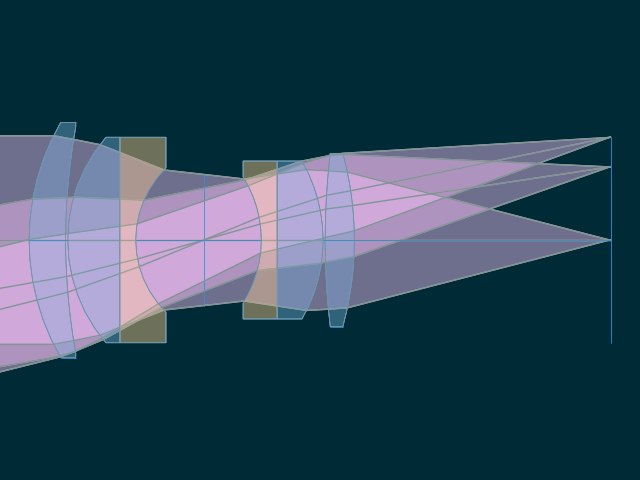

In [9]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False, is_dark=isdark).plot()

In [10]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  9.93938e+11       air      dummy  1  2.4782e+11
    1:     0.017793      8.75000    N-SSK2             1      28.172
    2:     0.006567     0.500000       air             1      27.136
    3:     0.026537      12.5000     N-SK2             1      24.626
    4:     0.000000      3.80000        F5             1      22.894
    5:     0.041269      16.3694       air             1      17.293
 Stop:     0.000000      13.7480       air             1      15.758
    7:    -0.035239      3.80000        F5             1      15.135
    8:     0.000000      11.0000    N-SK16             1      17.250
    9:    -0.026368     0.500000       air             1      18.926
   10:     0.005637      7.00000    N-SK16             1      20.349
   11:    -0.012593      61.4875       air             1      20.776
  Img:     0.000000      0.00000                dummy  1      24.739


In [11]:
pm.first_order_data()

efl                 100
f                   100
f'                  100
ffl              -29.32
pp1               70.68
bfl               61.49
ppk              -38.52
pp sep           -31.23
f/#                   2
m            -1.006e-10
red          -9.939e+09
obj_dist      9.939e+11
obj_ang              14
enp_dist          57.91
enp_radius           25
na obj        2.515e-11
n obj                 1
img_dist          61.49
img_ht            24.93
exp_dist         -53.16
exp_radius        28.66
na img            -0.25
n img                 1
optical invariant        6.233


In [12]:
osp.list_parax_trace()

stop surface: 6
           y           u           n*i         ybar         ubar        n*ibar
 0            0  2.51525e-11  2.51525e-11 -2.47817e+11     0.249328     0.249328
 1           25    -0.170628     0.444821     -14.4391     0.252237  -0.00758437
 2       23.507    -0.180751   -0.0263896      -12.232     0.359218     0.278896
 3      23.4166    -0.347265     0.440667     -12.0524     0.344338    0.0393784
 4      19.0758    -0.348123    -0.558186     -7.74817     0.345189     0.553482
 5      17.7529    -0.116096     0.616549     -6.43645     0.393199     0.127574
 6      15.8525    -0.116096    -0.116096 -1.74801e-06     0.393199     0.393199
 7      14.2564      0.11666    -0.618485      5.40568     0.316914     0.202706
 8      14.6998     0.115437     0.187054      6.60996     0.313591     0.508146
 9      15.9696   -0.0741853    -0.495263      10.0595     0.343587    0.0783442
10      15.9325   -0.0801657    0.0156197      10.2313     0.189957     0.401257
11      15.371

In [13]:
pt.list_model()

root
├── Object
├── E1
├── CE1
├── S1
├── CE2
├── E2
└── Image


In [14]:
pt.list_tree()

root
├── Object
│   └── p
│       └── Obj
├── AG1
│   └── t1
│       └── g0
├── E1
│   ├── p1
│   │   └── i1
│   ├── t
│   │   └── g1
│   └── p2
│       └── i2
├── AG2
│   └── t1
│       └── g2
├── CE1
│   ├── p1
│   │   └── i3
│   ├── t1
│   │   └── g3
│   ├── p2
│   │   └── i4
│   ├── t2
│   │   └── g4
│   └── p3
│       └── i5
├── AG3
│   └── t1
│       └── g5
├── S1
│   └── p
│       └── i6
├── AG4
│   └── t1
│       └── g6
├── CE2
│   ├── p1
│   │   └── i7
│   ├── t1
│   │   └── g7
│   ├── p2
│   │   └── i8
│   ├── t2
│   │   └── g8
│   └── p3
│       └── i9
├── AG5
│   └── t1
│       └── g9
├── E2
│   ├── p1
│   │   └── i10
│   ├── t
│   │   └── g10
│   └── p2
│       └── i11
├── AG6
│   └── t1
│       └── g11
└── Image
    └── p
        └── Img


In [15]:
em.list_model()

0: Object (DummyInterface): Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1: E1 (Element): Element: Spherical(c=0.01779284094091543), Spherical(c=0.006566600536925569), t=8.7500, sd=28.1719, glass: N-SSK2
2: CE1 (CementedElement): CementedElement: [3, 4, 5]
3: S1 (SurfaceInterface): Surface: Spherical(c=0.0), sd=15.7576
4: CE2 (CementedElement): CementedElement: [7, 8, 9]
5: E2 (Element): Element: Spherical(c=0.005636604951748545), Spherical(c=-0.0125926458590576), t=7.0000, sd=20.7763, glass: N-SK16
6: Image (DummyInterface): Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [16]:
em.list_ele_sg(pt, sm)

Object: object (0,) ()
AG1: air () (0,)
E1: lens (1, 2) (1,)
AG2: air () (2,)
CE1: cemented (3, 4, 5) (3, 4)
AG3: air () (5,)
S1: surface (6,) ()
AG4: air () (6,)
CE2: cemented (7, 8, 9) (7, 8)
AG5: air () (9,)
E2: lens (10, 11) (10,)
AG6: air () (11,)
Image: image (12,) ()


In [17]:
listobj(osp)

aperture: object epd; value=   50.0000
field: object angle; value=   14.0000
y =  0.000 ( 0.00) vlx= 0.000 vux= 0.000 vly= 0.000 vuy= 0.000
y = 10.000 ( 0.71) vlx= 0.000 vux= 0.000 vly= 0.250 vuy= 0.200
y = 14.000 ( 1.00) vlx= 0.000 vux= 0.000 vly= 0.400 vuy= 0.400
is_relative=False, is_wide_angle=False
central wavelength=  587.6000 nm
wavelength (weight) =  656.3000 (1.000),  587.6000 (1.000)*,  486.1000 (1.000)
focus shift=-0.4002686453541377



In [18]:
set_vignetting(opm)
listobj(osp)

aperture: object epd; value=   50.0000
field: object angle; value=   14.0000
y =  0.000 ( 0.00) vlx=-0.004 vux=-0.004 vly=-0.004 vuy=-0.004
y = 10.000 ( 0.71) vlx=-0.002 vux=-0.002 vly= 0.234 vuy= 0.200
y = 14.000 ( 1.00) vlx=-0.127 vux=-0.127 vly= 0.393 vuy= 0.400
is_relative=False, is_wide_angle=False
central wavelength=  587.6000 nm
wavelength (weight) =  656.3000 (1.000),  587.6000 (1.000)*,  486.1000 (1.000)
focus shift=-0.4002686453541377



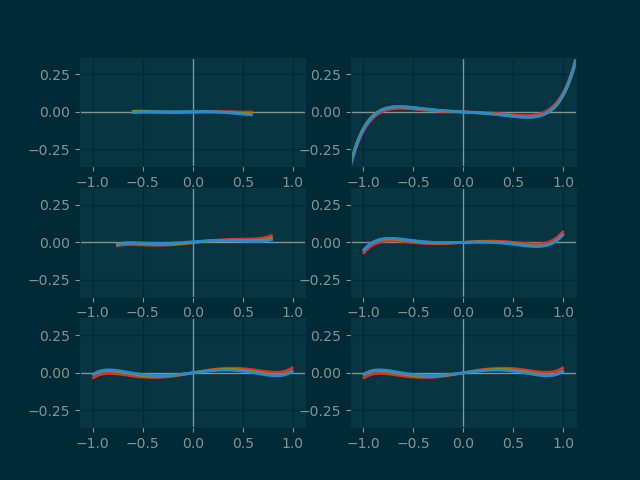

In [19]:
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', 
                     scale_type=Fit.All_Same, is_dark=isdark).plot()

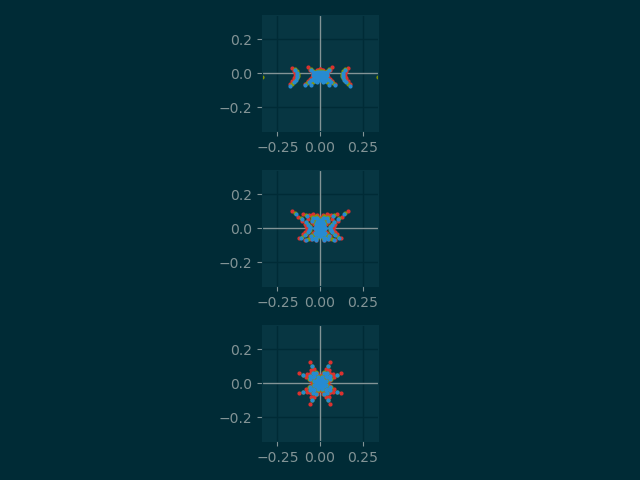

In [20]:
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm, 
                      scale_type=Fit.All_Same, is_dark=isdark).plot()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


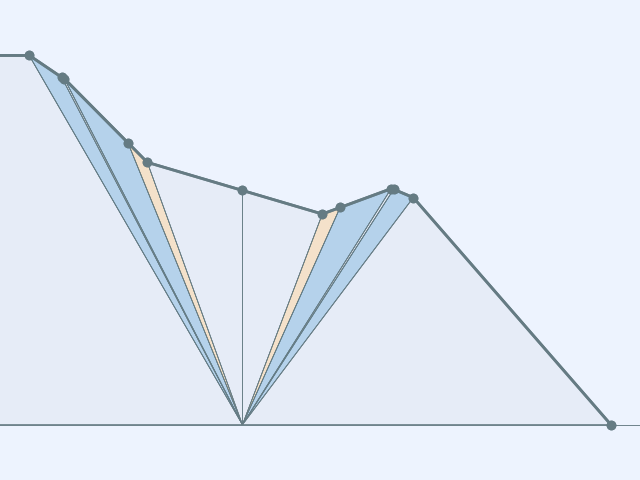

In [21]:
yybar_plt = plt.figure(FigureClass=InteractiveDiagram, opt_model=opm, dgm_type='ht').plot()

In [22]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = ar['parax_data']
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = pm.sys[-1][mc.indx]
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
out = widgets.Output()
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
with out:
    display(to_df)
    display(wv_df)
display(out)

fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

Output()

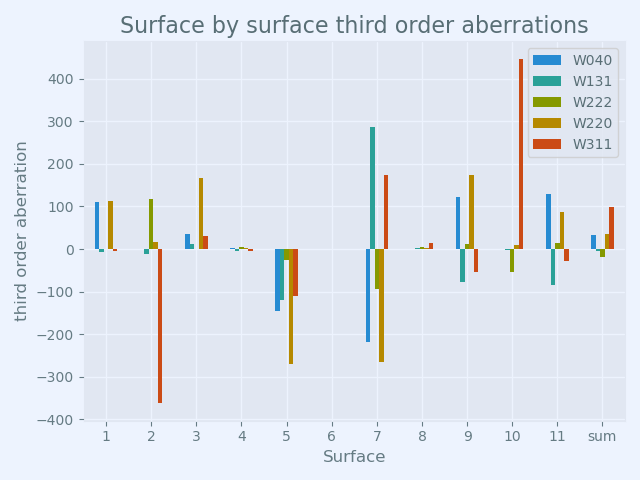

In [23]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

In [24]:
list_ray(osp['fov'].fields[2].chief_ray[0])

            X            Y            Z           L            M            N               Len
  0:      0.00000 -247816674315.63205            0     0.000000     0.241922     0.970296   1.0244e+12
  1:      0.00000    -14.40611       1.8777     0.000000     0.247454     0.968900       7.6249
  2:      0.00000    -12.51930      0.51547     0.000000     0.349083     0.937092       2.0119
  3:      0.00000    -11.81698       1.9008     0.000000     0.335724     0.941960       11.252
  4:      0.00000     -8.03932            0     0.000000     0.336554     0.941664       4.9422
  5:      0.00000     -6.37600      0.85391     0.000000     0.380100     0.924946       16.775
  6:      0.00000      0.00000            0     0.000000     0.380100     0.924946       14.296
  7:      0.00000      5.43384     -0.52511     0.000000     0.309998     0.950737       4.5492
  8:      0.00000      6.84409            0     0.000000     0.306748     0.951791       10.158
  9:      0.00000      9.96017   

In [25]:
fld2=osp['fov'].fields[2]

In [26]:
fld2.ref_sphere

(array([ 0.        , 24.5887392 , -0.40026865]),
 array([0.        , 0.20220234, 0.97934377]),
 np.float64(121.60462131108093),
 (array([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]),
  array([ 0.        ,  0.        , 61.48753642])))